In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt




In [16]:
# Data load csv file
data_path = './clean/cleaned_student_performance.csv'
data = pd.read_csv(data_path)

# Classification of grades 
def categorize_grade(grade):
    if grade <= 9:
        return 'Low'
    elif grade <= 13:
        return 'Medium'
    else:
        return 'High'

data['grade_category'] = data['G3'].apply(categorize_grade)

# Features
features = data.drop(['G3', 'grade_category', 'subject'], axis=1)
labels = data['grade_category']

# Encode categorical features
categorical_columns = ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 
                       'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in categorical_columns:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)


In [17]:


# Logistic Regression training (removed deprecated multi_class parameter)
model = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    C=1.0,
    random_state=42
)
model.fit(X_train, y_train)

# Predictions and classification
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

        High       0.90      0.83      0.87        54
         Low       0.87      0.67      0.75        60
      Medium       0.74      0.88      0.81        95

    accuracy                           0.81       209
   macro avg       0.84      0.79      0.81       209
weighted avg       0.82      0.81      0.81       209



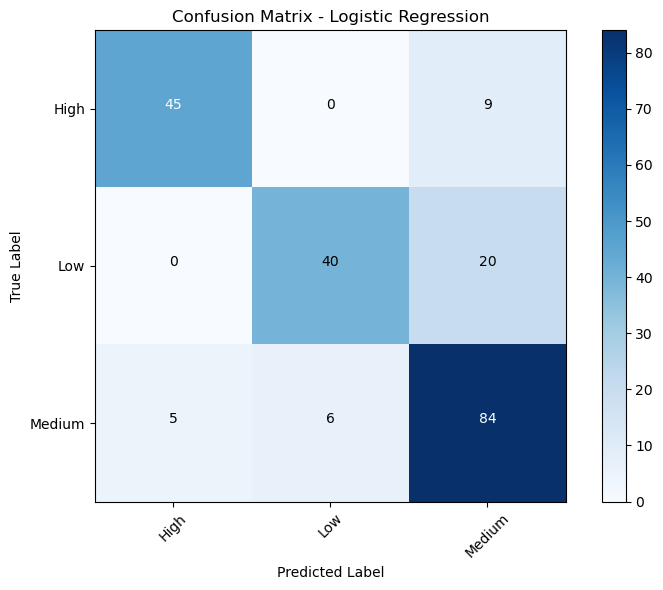


Coefficients of the Model:
      feature  coefficient
30         G2     4.807133
29         G1     0.978272
13   failures     0.411907
16       paid     0.319447
14  schoolsup     0.314367
6        Fedu     0.307510
5        Medu     0.305819
0         sex     0.222901
19     higher     0.221616
1         age     0.184665


In [18]:
# Confusion Matrix with matplotlib
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.colorbar()
classes = np.unique(labels)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], 
                 horizontalalignment="center", 
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Coefficients in the coefficient matrix
print("\nCoefficients of the Model:")
coef_df = pd.DataFrame({
    'feature': features.columns,
    'coefficient': np.abs(model.coef_[0])
}).sort_values('coefficient', ascending=False)
print(coef_df.head(10))